### Exercici

Crea una funció que donat un Array d’una dimensió, et faci un resum estadístic bàsic de les dades. Si detecta que l’array té més d’una dimensió, ha de mostrar un missatge d’error.

In [1]:
import numpy as np

In [2]:
def resum_estadistic(array):
    if array.ndim == 1:
        print("promig: ", array.mean())
        print("mitjana: ", np.median(array))
        print("variança: ", array.var())
        print("desviació estàndar: ", array.std())
    else: print("Error. La matriu no es unidimensional")

In [3]:
#fem un array d'una dimensió aleatoria entre int de 0-9
nums = np.arange(10)
array = np.random.choice(nums, 9)
array

array([2, 1, 7, 7, 6, 0, 8, 6, 1])

In [4]:
resum_estadistic(array)

promig:  4.222222222222222
mitjana:  6.0
variança:  8.839506172839506
desviació estàndar:  2.9731307022799225


In [5]:
#redimensionem i passem a la funció
matriu = array.reshape(3,3)
resum_estadistic(matriu)

Error. La matriu no es unidimensional


### Exercici

Crea una funció que et generi un quadrat NxN de nombres aleatoris entre el 0 i el 100.

In [6]:
def quadrat_aleatoris():
    nums = np.arange(101)
    random_num = np.random.choice(nums)
    print("Número aleatori: ", random_num, "\nQuadrat: ", random_num **2, "\n")

In [7]:
x = quadrat_aleatoris(), quadrat_aleatoris(), quadrat_aleatoris()

Número aleatori:  41 
Quadrat:  1681 

Número aleatori:  28 
Quadrat:  784 

Número aleatori:  90 
Quadrat:  8100 



### Exercici

Crea una funció que donada una taula de dues dimensions, et calculi els totals per fila i els totals per columna.

In [8]:
def totals_x_fila_i_columna(arr):
    suma_in_rows = arr.sum(axis=0)
    suma_in_cols = arr.sum(axis=1)
    print("Totals per columna: ", suma_in_rows)
    print("Totals per fila:\n", suma_in_cols.reshape(5,1))

In [9]:
#generem matriu aleatoria per passar a la funció
nums = np.arange(10)
matriu = np.random.choice(nums, 20).reshape(5,4)
matriu

array([[7, 6, 3, 2],
       [6, 2, 5, 5],
       [8, 6, 9, 8],
       [3, 4, 3, 0],
       [1, 3, 7, 8]])

In [10]:
totals_x_fila_i_columna(matriu)

Totals per columna:  [25 21 27 23]
Totals per fila:
 [[18]
 [18]
 [31]
 [10]
 [19]]


### Exercici

Implementa manualment una funció que calculi el coeficient de correlació. Informa’t-en sobre els seus usos i interpretació.

Definim funcions de les fórmules estadístiques que necessitarem

In [11]:
#definim funció que ens retorna el promig d'un array
def promig(a):
    return a.sum() / len(a)

Fórmula covariança
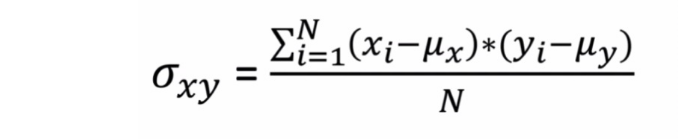

In [12]:
#partint de la fórmula definim una funció que ens retorna la covariança entre dos arrays
def covarianca(a1, a2):
    p1 = promig(a1)
    p2 = promig(a2)
    numerador = 0
    for v1, v2 in np.nditer([a1,a2]):
        numerador += (v1 - p1) * (v2 - p2)
    covarianca = numerador / (len(a1))
    return covarianca

Fórmula variança
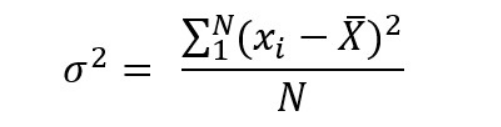

In [13]:
#partint de la fórmula definim una funció que ens retorna la variança
def varianca(a):
    p = promig(a)
    numerador = 0
    for v in np.nditer(a):
        numerador += (v - p) **2
    varianca = numerador / (len(a))
    return varianca

In [14]:
#fem la desviació estándar que es l'arrel quadrada de la variança
import math

def desviacio_estandar(a):
    desv_st = math.sqrt(varianca(a))
    return desv_st

Coeficient de correlació
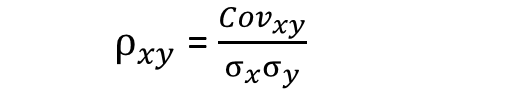

In [15]:
#i partint de la fórmula definim una funció que ens retorna el coeficient de correlació
def coeficient_correlacio(a1, a2):
    cp = covarianca(a1, a2) / (desviacio_estandar(a1) * desviacio_estandar(a2))
    return cp

In [16]:
#generem dos arrays aleatoris de la mateixa longitud
nums = np.arange(10)
length = 7
array1 = np.random.choice(nums, length)
array2 = np.random.choice(nums, length)
array1, array2

(array([8, 4, 9, 5, 7, 5, 2]), array([7, 4, 3, 8, 8, 2, 2]))

In [17]:
coeficient_correlacio(array1, array2)

0.3691021375156689

el coeficient de correlació ens mostra la relació lineal entre els dos conjunts de mostres. Quan més proper al zero menys linealitat hi haurà, mentre que quan més s'acostin a l'1 o -1, aquesta sera major. (En el cas de ser -1 la correlació sera inversament lineal)

In [18]:
#si ho fem amb la funció corrcoef de numpy veiem que coincideix
np.corrcoef([array1,array2])

array([[1.        , 0.36910214],
       [0.36910214, 1.        ]])